In [1]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HUGGINGFACEHUB_API_TOKEN']

In [2]:
def is_url(path):
    # 常见的 URL 协议
    url_protocols = ["http://", "https://", "ftp://", "ftps://", "sftp://", "file://"]
    
    # 检查路径是否以常见的 URL 协议开头
    for protocol in url_protocols:
        if path.startswith(protocol):
            return True
    return False

In [3]:
# Helper functions
import requests, json

#Image-to-text endpoint
def get_completion(bytes, ENDPOINT_URL=os.environ['HF_API_ITT_BASE']): 
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }
    response = requests.post(ENDPOINT_URL, headers=headers, data=bytes)
    return json.loads(response.content.decode("utf-8"))

In [4]:
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:1080/pac?auth=6kW2t5wCi1UNt1VioOiy&t=202404181401516765' # 7890改为自己的梯子端口
os.environ["HTTP_PROXY"]  = 'http://127.0.0.1:1080/pac?auth=6kW2t5wCi1UNt1VioOiy&t=202404181401516765'

In [5]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

img_url = 'https://free-images.com/sm/9596/dog_animal_greyhound_983023.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')


# # conditional image captioning
# text = "a photography of"
# inputs = processor(raw_image, text, return_tensors="pt")

# out = model.generate(**inputs)
# print(processor.decode(out[0], skip_special_tokens=True))
# # >>> a photography of a woman and her dog

# # unconditional image captioning
# inputs = processor(raw_image, return_tensors="pt")

# out = model.generate(**inputs)
# print(processor.decode(out[0], skip_special_tokens=True))



d:\python_env\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\python_env\py310\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\Program\huggingface\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode,

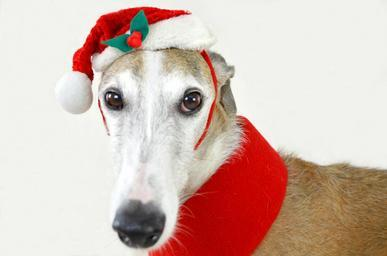

In [9]:
raw_image

In [12]:
type(raw_image)

PIL.Image.Image

In [11]:
# 导入所需的库
import gradio as gr
import io
import base64

# 将PIL图像转换为base64编码的字符串
def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

def image_to_byte(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    return byte_arr.getvalue()

# 图像描述生成函数，类似于之前定义的函数
def captioner(image):
    # print(f'image: {image}')
    # 将上传的图像转换为base64字符串
    # base64_image = image_to_base64_str(image)
    byte_arr = image_to_byte(image)
    # 使用图像描述生成的pipeline生成图像描述
    result = get_completion(byte_arr)
    return result[0]['generated_text']

# 关闭之前的Gradio界面（如果有的话）
gr.close_all()

# 创建Gradio界面，接受上传的图像并显示描述
demo = gr.Interface(
    fn=captioner,  # 指定用于处理输入的函数
    inputs=[gr.Image(label="Upload image", type="pil")],  # 输入部分的设置，允许上传图像
    outputs=[gr.Textbox(label="Caption")],  # 输出部分的设置，显示生成的图像描述
    title="Image Captioning with BLIP",  # 界面标题
    description="Caption any image using the BLIP model",  # 界面描述
    allow_flagging="never",  # 设置不允许标记内容
)

# 启动共享模式的界面，允许其他用户访问
demo.launch(share=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
